In [ ]:
# Install required packages
!pip install snscrape vaderSentiment wordcloud

# Download NLTK data (only once)
import nltk
nltk.download('stopwords')
nltk.download('punkt')



In [2]:
import zipfile
import pandas as pd

# Unzip the uploaded file
with zipfile.ZipFile("/content/tweets.csv.zip", 'r') as zip_ref:
    zip_ref.extractall("/content")

# Load the CSV file
df = pd.read_csv("/content/tweets.csv")
df.head()


,author,content,country,date_time,id,language,latitude,longitude,number_of_likes,number_of_shares
0,katyperry,Is history repeating itself...?#DONTNORMALIZEH...,NaN,12/01/2017 19:52,8.196330e+17,en,NaN,NaN,7900,3472
1,katyperry,@barackobama Thank you for your incredible gra...,NaN,11/01/2017 08:38,8.191010e+17,en,NaN,NaN,3689,1380
2,katyperry,Life goals. https://t.co/XIn1qKMKQl,NaN,11/01/2017 02:52,8.190140e+17,en,NaN,NaN,10341,2387
3,katyperry,Me right now 🙏🏻 https://t.co/gW55C1wrwd,NaN,11/01/2017 02:44,8.190120e+17,en,NaN,NaN,10774,2458
4,katyperry,SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...,NaN,10/01/2017 05:22,8.186890e+17,en,NaN,NaN,17620,4655


In [3]:
import re

def clean_tweet(tweet):
    if pd.isnull(tweet):
        return ""
    tweet = re.sub(r"http\S+|@\S+|#\S+", "", tweet)  # Remove URLs, mentions, hashtags
    tweet = re.sub(r"[^a-zA-Z\s]", "", tweet.lower())  # Lowercase & remove punctuation
    return tweet

df["Cleaned_Content"] = df["content"].apply(clean_tweet)
df[["content", "Cleaned_Content"]].head()


,content,Cleaned_Content
0,Is history repeating itself...?#DONTNORMALIZEH...,is history repeating itself
1,@barackobama Thank you for your incredible gra...,thank you for your incredible grace in leader...
2,Life goals. https://t.co/XIn1qKMKQl,life goals
3,Me right now 🙏🏻 https://t.co/gW55C1wrwd,me right now
4,SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...,sisters are doin it for themselves


In [4]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = analyzer.polarity_scores(text)["compound"]
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df["Sentiment"] = df["Cleaned_Content"].apply(get_sentiment)
df[["Cleaned_Content", "Sentiment"]].head()


,Cleaned_Content,Sentiment
0,is history repeating itself,Neutral
1,thank you for your incredible grace in leader...,Positive
2,life goals,Neutral
3,me right now,Neutral
4,sisters are doin it for themselves,Neutral


/tmp/ipython-input-5-1785076795.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Sentiment", palette="pastel")


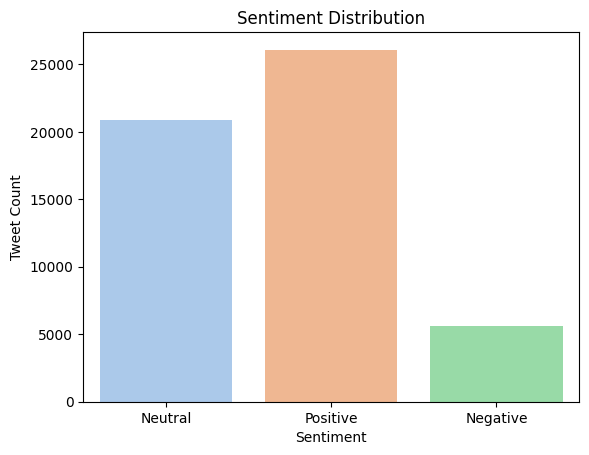

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x="Sentiment", palette="pastel")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()


In [6]:
# Save the updated DataFrame
df.to_csv("tweets_with_sentiment.csv", index=False)

# Download to your system
from google.colab import files
files.download("tweets_with_sentiment.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
import pandas as pd

df = pd.read_csv("/content/tweets_with_sentiment.csv")
df.head()



,author,content,country,date_time,id,language,latitude,longitude,number_of_likes,number_of_shares,Cleaned_Content,Sentiment
0,katyperry,Is history repeating itself...?#DONTNORMALIZEH...,NaN,12/01/2017 19:52,8.196330e+17,en,NaN,NaN,7900,3472,is history repeating itself,Neutral
1,katyperry,@barackobama Thank you for your incredible gra...,NaN,11/01/2017 08:38,8.191010e+17,en,NaN,NaN,3689,1380,thank you for your incredible grace in leader...,Positive
2,katyperry,Life goals. https://t.co/XIn1qKMKQl,NaN,11/01/2017 02:52,8.190140e+17,en,NaN,NaN,10341,2387,life goals,Neutral
3,katyperry,Me right now 🙏🏻 https://t.co/gW55C1wrwd,NaN,11/01/2017 02:44,8.190120e+17,en,NaN,NaN,10774,2458,me right now,Neutral
4,katyperry,SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...,NaN,10/01/2017 05:22,8.186890e+17,en,NaN,NaN,17620,4655,sisters are doin it for themselves,Neutral


In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [9]:
def generate_wordcloud(data, sentiment_label):
    text = " ".join(data[data['Sentiment'] == sentiment_label]['Cleaned_Content'].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud - {sentiment_label}", fontsize=16)
    plt.show()


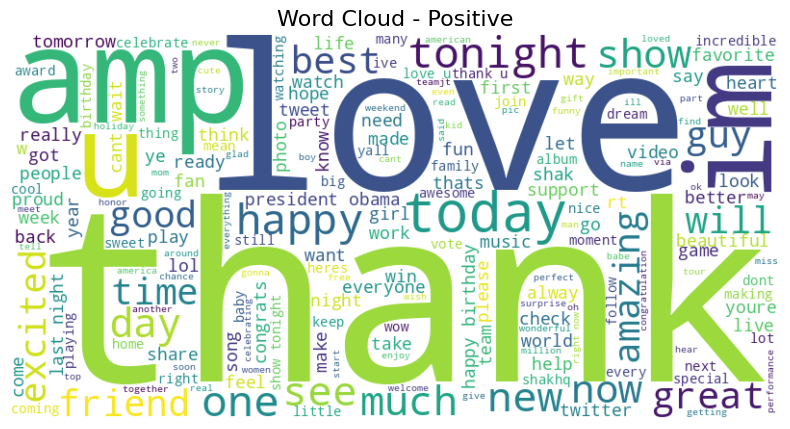

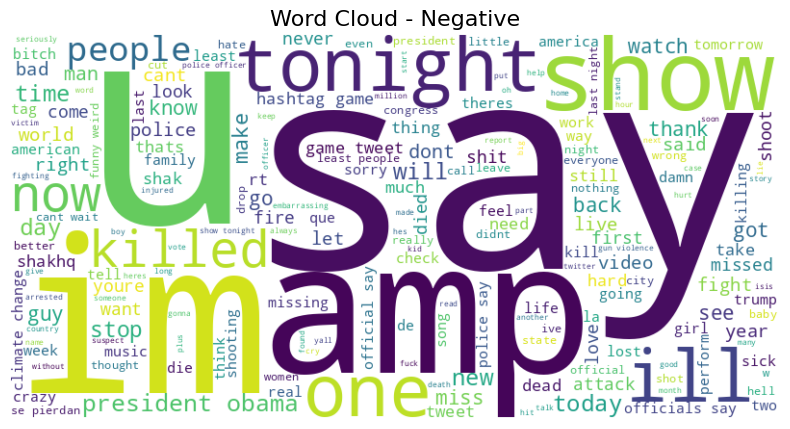

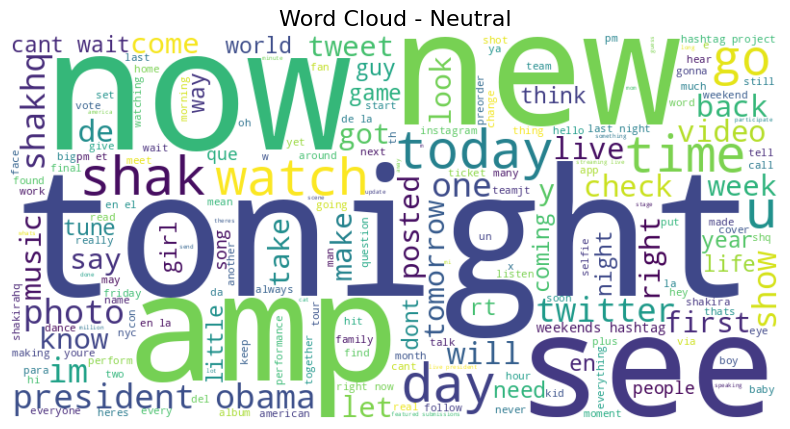

In [10]:
for sentiment in ['Positive', 'Negative', 'Neutral']:
    generate_wordcloud(df, sentiment)


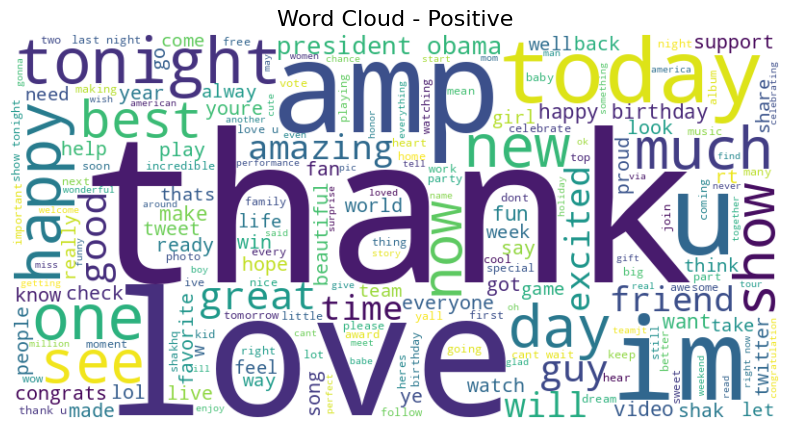

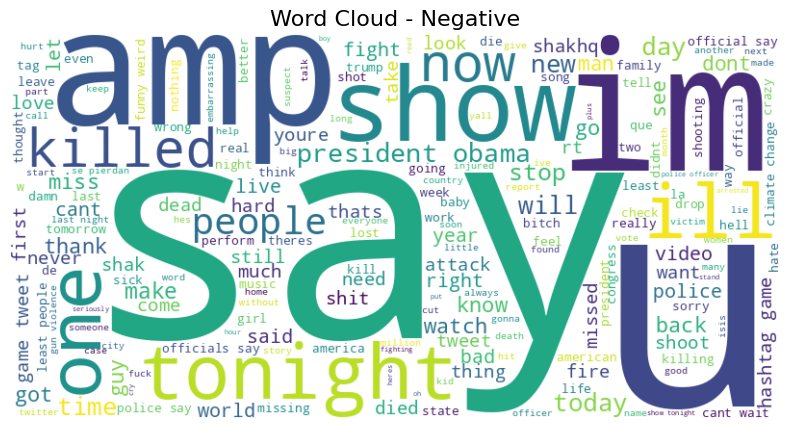

In [11]:
# Already done functionally — just run for each sentiment
for sentiment in ['Positive', 'Negative']:
    generate_wordcloud(df, sentiment)


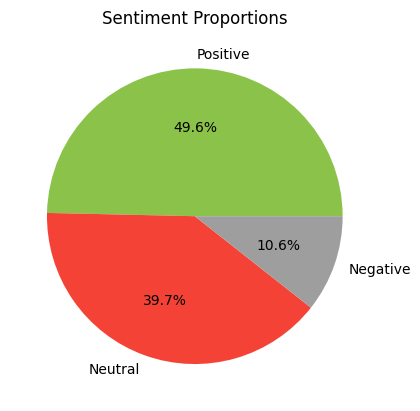

In [12]:
df['Sentiment'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#8BC34A', '#F44336', '#9E9E9E'])
plt.title("Sentiment Proportions")
plt.ylabel("")  # Hide y-label
plt.show()



In [13]:
plt.savefig("sentiment_pie_chart.png")


<Figure size 640x480 with 0 Axes>

In [14]:
df.to_csv("sentiment_results.csv", index=False)
from google.colab import files
files.download("sentiment_results.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
import pandas as pd
df = pd.read_csv("/content/sentiment_results.csv")
df.head()


,author,content,country,date_time,id,language,latitude,longitude,number_of_likes,number_of_shares,Cleaned_Content,Sentiment
0,katyperry,Is history repeating itself...?#DONTNORMALIZEH...,NaN,12/01/2017 19:52,8.196330e+17,en,NaN,NaN,7900,3472,is history repeating itself,Neutral
1,katyperry,@barackobama Thank you for your incredible gra...,NaN,11/01/2017 08:38,8.191010e+17,en,NaN,NaN,3689,1380,thank you for your incredible grace in leader...,Positive
2,katyperry,Life goals. https://t.co/XIn1qKMKQl,NaN,11/01/2017 02:52,8.190140e+17,en,NaN,NaN,10341,2387,life goals,Neutral
3,katyperry,Me right now 🙏🏻 https://t.co/gW55C1wrwd,NaN,11/01/2017 02:44,8.190120e+17,en,NaN,NaN,10774,2458,me right now,Neutral
4,katyperry,SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...,NaN,10/01/2017 05:22,8.186890e+17,en,NaN,NaN,17620,4655,sisters are doin it for themselves,Neutral
